In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

def compute_len(data):
    len_all = []
    for entry in data:
        tmp_len = len(entry)
        len_all.append(tmp_len)
    return len_all

def plot_histogram(data, bin_step, name):
    # Create the histogram
    max_val = max(data)
    min_val = min(data)
    if min_val >= 100:
        min_val = 100
    else:
        min_val = 0
    bin_edges = list(range(min_val, max_val + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(180/255, 211/255, 178/255), edgecolor='black', alpha=0.99, rwidth=0.87)    
    #print(n)
    #print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Sequence Length Ranges')
    plt.xlabel('Sequence Length')
    plt.ylabel('Number of Instances')
    # plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

In [2]:
'''    
def lysozyme_to_fasta(sequences, file_name="output.fasta"):
    with open(file_name, 'w') as file:
        for seq in sequences:
            # Extracting accession identifier and sequence
            accession = seq['sequence']['metadata']['accession']
            sequence = seq['sequence']['metadata']['sequence']
            # Writing the header with accession identifier
            file.write(f">{accession}\n")
            # Writing the amino acid sequence
            file.write(f"{sequence}\n")
     
lysozyme_data_file = os.path.join("data/filtered_data_PF00959.p") 
# Reload predicted_data from the .p file
lysozyme_data = False
with open(lysozyme_data_file, "rb") as file:
    lysozyme_data = pickle.load(file)

print(type(lysozyme_data))
print(lysozyme_data[0])

lysozyme_to_fasta(lysozyme_data, file_name="lysozymes_db.fasta")'''

'    \ndef lysozyme_to_fasta(sequences, file_name="output.fasta"):\n    with open(file_name, \'w\') as file:\n        for seq in sequences:\n            # Extracting accession identifier and sequence\n            accession = seq[\'sequence\'][\'metadata\'][\'accession\']\n            sequence = seq[\'sequence\'][\'metadata\'][\'sequence\']\n            # Writing the header with accession identifier\n            file.write(f">{accession}\n")\n            # Writing the amino acid sequence\n            file.write(f"{sequence}\n")\n     \nlysozyme_data_file = os.path.join("data/filtered_data_PF00959.p") \n# Reload predicted_data from the .p file\nlysozyme_data = False\nwith open(lysozyme_data_file, "rb") as file:\n    lysozyme_data = pickle.load(file)\n\nprint(type(lysozyme_data))\nprint(lysozyme_data[0])\n\nlysozyme_to_fasta(lysozyme_data, file_name="lysozymes_db.fasta")'

In [3]:
import os
def read_fasta(file_path):
    """
    Reads a FASTA file with a single protein sequence.
    Args:
    file_path (str): The path to the FASTA file.
    Returns:
    tuple: A tuple containing the identifier and the protein sequence as strings.
    """
    with open(file_path, 'r') as file:
        lines = file.readlines()
        identifier = lines[0].strip()[4:21]  # Remove '>' and any trailing newline character
        sequence = ''.join(line.strip() for line in lines[1:])  # Concatenate the remaining lines
        return identifier, sequence
sequences_and_identifiers = []
fasta_dir = 'FASTA_lysozymes_of_interest/'
for file in os.listdir(fasta_dir):
    sequences_and_identifiers.append((read_fasta(fasta_dir + file)))

P03706 = sequences_and_identifiers[1]
print(P03706)
P03706 = P03706[1]
original = P03706
original_id = 'P03706'
protein_base = 0.5
'''
Q37875 = sequences_and_identifiers[0]
print(Q37875)
Q37875 = Q37875[1]
print(Q37875)
protein_base = 0.5
offset = int(protein_base * len(Q37875))
# Adjust for zero-based indexing
offset = offset - 1 if offset > 0 else 0
print('only offset: ', Q37875[:offset])
original = Q37875
original_id = 'Q37875'



P78285 = sequences_and_identifiers[2]
print(P78285)
P78285 = P78285[1]
original = P78285
original_id = 'P78285'
protein_base = 0.5


P00720 = sequences_and_identifiers[3]
print(P00720)
P00720 = P00720[1]
original = P00720
original_id = 'P00720'
protein_base = 0.5
offset = int(protein_base * len(P00720))
# Adjust for zero-based indexing
offset = offset - 1 if offset > 0 else 0
print('only offset: ', P00720[:offset])
print(len(P00720))
'''

FileNotFoundError: [Errno 2] No such file or directory: 'FASTA_lysozymes_of_interest/'

In [ ]:
import pickle
import os
# FOR SPECIFIC LYSOZYMES:
# paths to the saved .p files 
data_dir = "Generation_PF00959_model_lr_00001_phage_specific/"

# FOR ONLY KEY GENERATION
#data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned/predicted_stopped/"
#data_dir = "results_generation/last results/Generation_PF00959_model_lr_00001_fine_tuned_due/predicted_stopped/"
#original_id = 'p'
#predicted_data_file = os.path.join(data_dir, "") 
#predicted_stopped_file = os.path.join(data_dir, "predicted_stopped_data_Q37875|ENLYS_BPP1_top_p_0.75seed_percentage_0.5.p") 
#predicted_data_file = os.path.join(data_dir, "predicted_data_p0.50_p1.2_t_0.9.p") 


# Reload predicted_data from the .p file
#predicted_data = False
#with open(predicted_data_file, "rb") as file:
#    predicted_data = pickle.load(file)

# Reload predicted_data stopped from the .p file
#predicted_stopped_data = False
#with open(predicted_stopped_file, "rb") as file:
#    predicted_stopped_data = pickle.load(file)
print(os.listdir(data_dir))

In [4]:
def filter_data_for_duplicates(predicted_stopped_data, original):
    filtered_stopped_data = []
    original_count = 0
    for seq in predicted_stopped_data:
        if seq == original:
            original_count += 1
        elif seq not in filtered_stopped_data:
            filtered_stopped_data.append(seq)
    print('original_sequence_count', original_count)
    print('original length: ', len(original))
    print('stopped_generated_sequences_number: ', len(predicted_stopped_data))
    print('filtered sequences_number: ', len(filtered_stopped_data))
    print('duplicates: ', len(predicted_stopped_data) - len(filtered_stopped_data))
    #
    if len(filtered_stopped_data) < 10:
        raise ZeroDivisionError
    # average sequence length calculation
    add = 0
    for i in predicted_stopped_data:
        add += len(i)
    add /=len(predicted_stopped_data)
    print('average len calculation of generated stopped: ', add)
    
    mean = sum(len(i) for i in filtered_stopped_data) / len(filtered_stopped_data)
    # Calculate the variance
    variance = sum((len(i) - mean) ** 2 for i in filtered_stopped_data) / len(filtered_stopped_data)
    # Calculate the standard deviation (square root of variance)
    std_deviation = variance ** 0.5
    print('average len calculation of filtered generated stopped: ', mean)
    print('std calculation of filtered generated stopped: ', std_deviation)

    print('----------------------histograms----------------------')
    len_data = compute_len(predicted_stopped_data)
    plot_histogram(len_data, 100, 'PF_generation1')
    
    len_data = compute_len(filtered_stopped_data)
    plot_histogram(len_data, 100, 'PF_generation1_filtered')
    
    return filtered_stopped_data

#original = Q37875
#filtered_stopped_data = filter_data_for_duplicates(predicted_stopped_data, original)


In [5]:
predicted_stopped_dictionary = {}
for filename in os.listdir(data_dir):
    if 'predicted_stopped_data' in filename:
        if original_id in filename:
            predicted_stopped_data = False
            predicted_stopped_file = data_dir + filename
            with open(predicted_stopped_file, "rb") as file:
                predicted_stopped_data = pickle.load(file)
            print(filename)
            try: 
                filtered_stopped_data = filter_data_for_duplicates(predicted_stopped_data, original)
                predicted_stopped_dictionary[filename] = filtered_stopped_data
            except ZeroDivisionError:
                print('-----sequences detected less than 10-----')
            #vanno ancora tolti gli amminoacidi seed sequence based on seed percentage in keyname in dictionary

NameError: name 'data_dir' is not defined

In [6]:
# we have a list of amino acid sequences, function to transform it into a FASTA format file
import pickle
def list_to_fasta(sequences, file_name, original_yes, after_percentage):
    with open(file_name, 'w') as file:
        unique_sequences = []
        count = 0
        if original_yes:
            file.write(f">Original\n")
            file.write(f"{original}\n")
            unique_sequences.append(original)
        for idx, sequence in enumerate(sequences):
            if sequence not in unique_sequences:
                offset = int(len(sequence)*after_percentage)
                #print(offset)
                #print(len(sequence))
                unique_sequences.append(sequence)
                sequence = sequence[offset:]
                # Writing the header for each sequence
                file.write(f">Sequence_{idx + 1}\n")
                # Writing the amino acid sequence
                file.write(f"{sequence}\n")
            else:
                count += 1
        print('duplicates check ', count)
        print('uniques: ', len(unique_sequences))

#list_to_fasta(predicted_stopped_data, file_name="predicted_stopped_075.fasta")
# list_to_fasta(filtered_stopped_data, file_name="fasta_generated/predicted_stopped_Q37875_topp_075_seed_050_cutted.fasta")

original_sequence_count 0
original length:  0
stopped_generated_sequences_number:  674
filtered sequences_number:  662
duplicates:  12
average len calculation of generated stopped:  254.71513353115728
average len calculation of filtered generated stopped:  255.02416918429003
std calculation of filtered generated stopped:  56.614288510805025
----------------------histograms----------------------


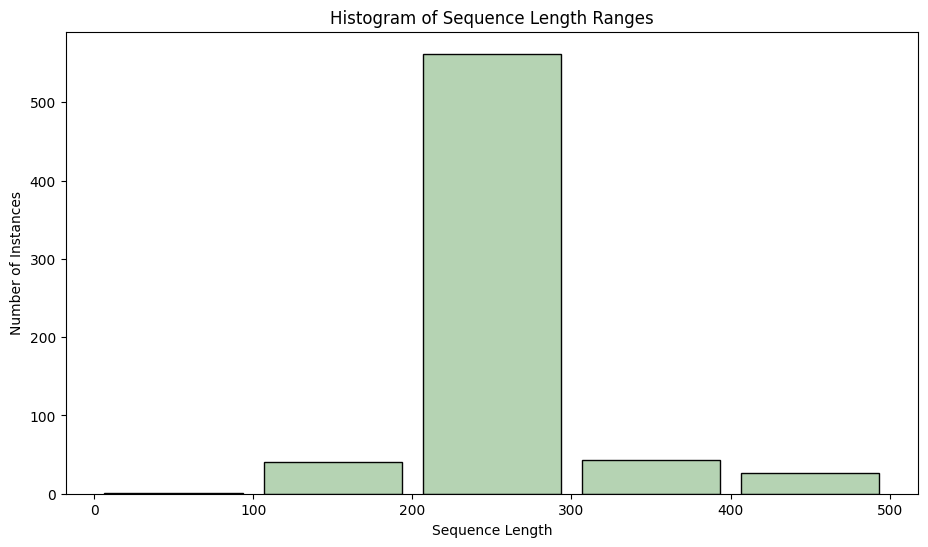

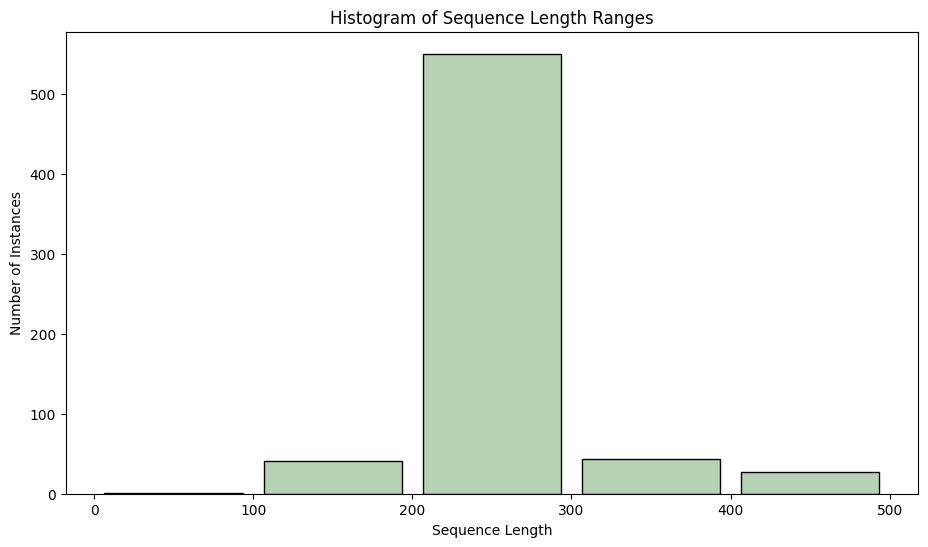

duplicates check  0
uniques:  662


In [7]:
with open('data_halogenase/analysis_high_and_low_ppx_model_trained_with_flip050/highppx.p', "rb") as file:
    high_ppx = pickle.load(file)
filtered_stopped_data = filter_data_for_duplicates(high_ppx, '')
fasta_high = list_to_fasta(filtered_stopped_data, 'data_halogenase/analysis_high_and_low_ppx_model_trained_with_flip050/highppx.fasta', False, 0)

original_sequence_count 0
original length:  0
stopped_generated_sequences_number:  1031
filtered sequences_number:  751
duplicates:  280
average len calculation of generated stopped:  228.65858389912705
average len calculation of filtered generated stopped:  231.04660452729695
std calculation of filtered generated stopped:  34.089280617979085
----------------------histograms----------------------


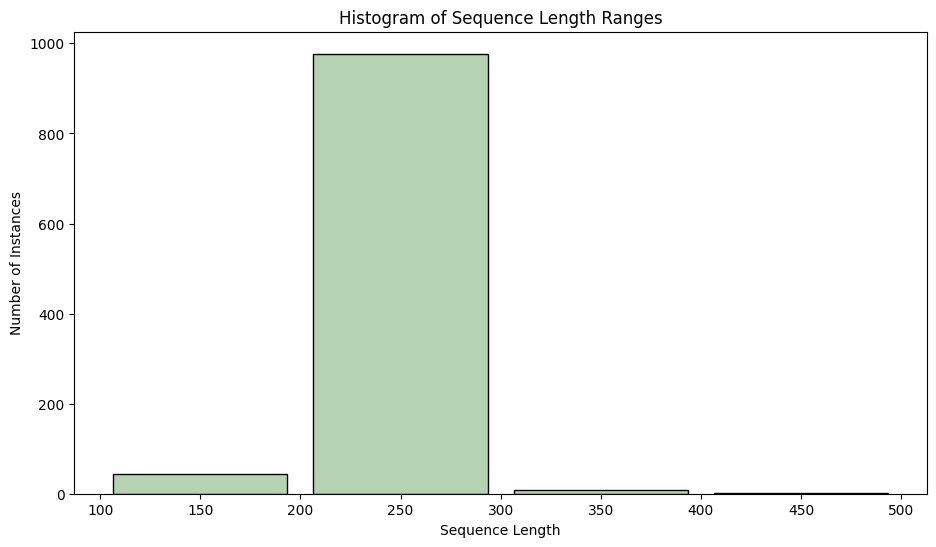

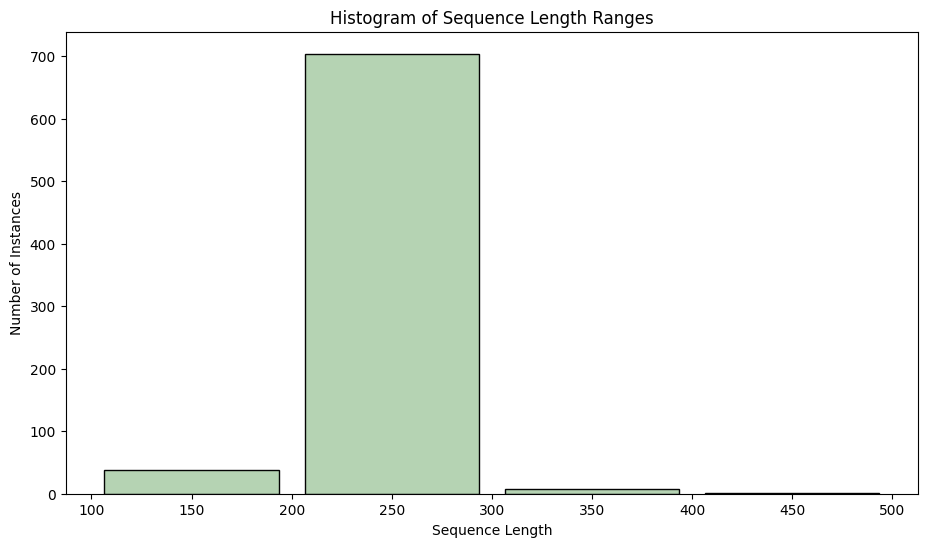

duplicates check  0
uniques:  751


In [9]:
with open('data_halogenase/analysis_high_and_low_ppx_model_trained_with_flip050/lowppx.p', "rb") as file:
    low_ppx = pickle.load(file)
filtered_stopped_data = filter_data_for_duplicates(low_ppx, '')
fasta_high = list_to_fasta(filtered_stopped_data, 'data_halogenase/analysis_high_and_low_ppx_model_trained_with_flip050/lowppx.fasta', False, 0)

19048
19048
original_sequence_count 0
original length:  0
stopped_generated_sequences_number:  19048
filtered sequences_number:  17717
duplicates:  1331
average len calculation of generated stopped:  259.75488240235194
average len calculation of filtered generated stopped:  260.6245414009144
std calculation of filtered generated stopped:  48.14639819277886
----------------------histograms----------------------


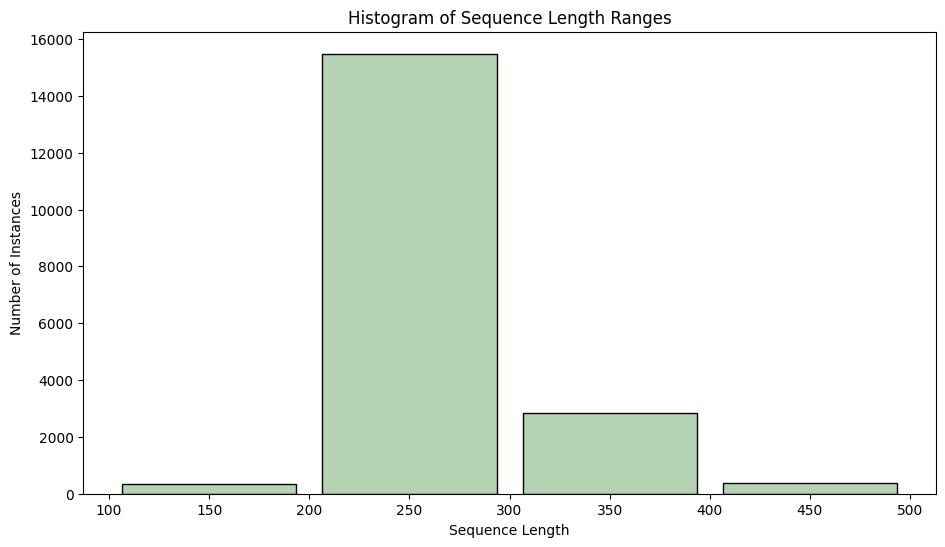

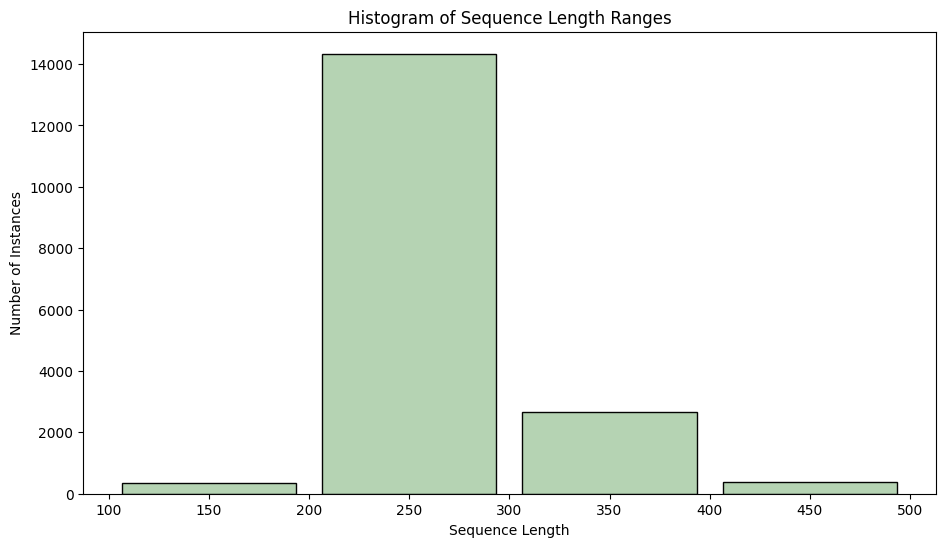

duplicates check  0
uniques:  17717


In [27]:
with open('data_halogenase/dataset/test.p', "rb") as file:
    test = pickle.load(file)
with open('data_halogenase/dataset/training.p', "rb") as file:
    train = pickle.load(file)
merged_data = {**test, **train}
print(len(merged_data))
seq_values = [merged_data[key]['seq'] for key in merged_data]
print(len(seq_values))
filtered_stopped_data = filter_data_for_duplicates(seq_values, '')
fasta_hidroall = list_to_fasta(filtered_stopped_data, 'data_halogenase/dataset/hydro_dataset.fasta', False, 0)

In [ ]:
for file in predicted_stopped_dictionary:
    file_fasta = file[:-2] + ".fasta"
    index_of_percentage = file.rfind('_') + 1
    after_percentage = float(file[index_of_percentage:-2])
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, False, after_percentage)

    # with original
    file_fasta = file[:-2] + '_with_original' + ".fasta"
    index_of_percentage = file.rfind('_') + 1
    after_percentage = float(file[index_of_percentage:-2])
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, True, after_percentage)

In [ ]:
#FOR only key generation
'''
for file in predicted_stopped_dictionary:
    file_fasta = file[:-2] + ".fasta"
    after_percentage = 0
    #print(after_percentage)
    file_fasta = "fasta_generated/" + file_fasta
    list_to_fasta(predicted_stopped_dictionary[file], file_fasta, False, after_percentage)
'''

<h3> blast was performed on the stopped databases. i have tabular data with max id hit for each sequence </h3>

In [11]:
import matplotlib.pyplot as plt
def plot_histogram(data, bin_step, name):
    # Create the histogram
    min_data = min(data)
    print('min(data): ', min(data))
    j = 0
    while min_data > (j+10):
        j += 10
    bin_edges = list(range(j, 100 + bin_step, bin_step))
    #print(bin_edges)
    plt.figure(figsize=(11, 6))
    n, bins, _ = plt.hist(data, bins=bin_edges, color=(125/255, 180/255, 232/255), edgecolor=(68/255, 127/255, 176/255), alpha=0.99, rwidth=0.87)    
    print(n)
    print(bins)
    # Title, labels, and legend
    plt.title('Histogram of Max-ID Ranges')
    plt.xlabel('ID-percentage range')
    plt.ylabel('Number of Instances')
    plt.legend()
    plt.savefig(name + '_Histogram.svg')
    # Display the plot
    plt.show()

In [16]:
#data_dir = 'fasta_generated/tab_data/'
data_dir = 'data_halogenase/analysis_high_and_low_ppx_model_trained_with_flip050/res/'
print(data_dir)
files_to_read = os.listdir(data_dir)
#files_to_read.pop(1)
print(files_to_read)

data_halogenase/analysis_high_and_low_ppx_model_trained_with_flip050/res/
['Low_ppx_Galaxy15-[query_results_on_data_13].tabular', 'High_ppx_Galaxy14-[query_results_on_data_11].tabular']


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Low_ppx_Galaxy15-[query_results_on_data_13].tabular
            #c1              c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  \
0    Sequence_1  Sequence_16619  90.411  219  21   0   1  219  24  242  ...   
1   Sequence_10   Sequence_4280  85.075  201  30   0   1  201  20  220  ...   
2  Sequence_100  Sequence_17437  97.861  187   4   0   1  187  20  206  ...   

   c17    c18 c19  c20                                                c21  \
0    0  93.15   1    1  GTVVDWHGSIAREVAALYPQVDADAFALAWRAGYQPAMARVMRGEQ...   
1    0  94.03   1    1  SAAEKCKDKIGDKWEGFANYWRTTQLEYTWLRSLMKRHKDFWQITE...   
2    0  99.47   1    1  ERLYDAEIGPERRAALFASVDLHGMNDRVDLGEDFHAQVSALAAAH...   

                                                 c22  c23  c24  \
0  GTVVDWHGSIVREMQALYPAVDGDAFALAWRAGYQPAMARVMRGEQ...  219  242   
1  SAAEKCKDKIGDKWEGFANYWRTTQLEYTWLRSLMNRHKDFWQVTE...  201  220   
2  ERLYDAEIGPERRAALFASVDLHGMNERVDLGEDFHAQVSALAAAH...  188  206   

              c25  rn  
0  Sequence_16619   1  
1   Seque

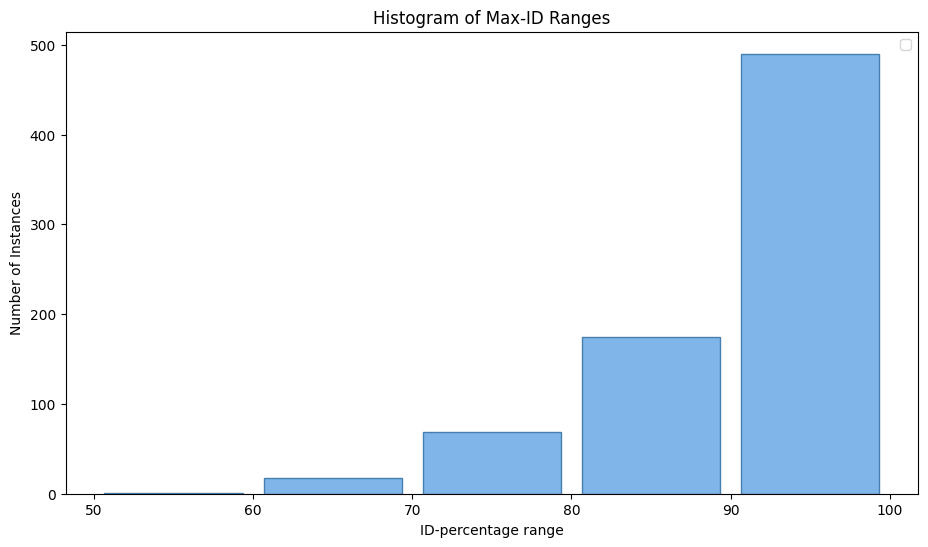

High_ppx_Galaxy14-[query_results_on_data_11].tabular


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


            #c1              c2      c3   c4  c5  c6  c7   c8  c9  c10  ...  \
0    Sequence_1  Sequence_15923  75.532  282  64   2   2  278  16  297  ...   
1   Sequence_10  Sequence_17022  76.370  292  66   2   1  291   9  298  ...   
2  Sequence_100   Sequence_6338  82.288  271  46   2   2  272  23  291  ...   

   c17    c18 c19  c20                                                c21  \
0    5  85.46   1    1  DYPFAPHYLDVEPG----LRMHYVDEGPRDASPVLMLHGEPSWSYL...   
1    3  84.25   1    1  FASHWLDVDGHRYHYLDEGPRSAPPLLMLHGNPTWSYYWRHLIAGL...   
2    2  86.72   1    1  DGVRLAYVEAGEGDPIVLLHGWPEDHLAWEHQIGPLSRLRRVIAPD...   

                                                 c22  c23  c24  \
0  DYPFAPHYQTVTDGDGTPLRIHYIDEGPRDAAPVLLMHGEPSWSYL...  278  304   
1  FASHWFERDGHRLHYVDEG--TGPPVLFLHGNPSWSYMWRYPVLAL...  291  302   
2  DGARLHYAEAGTGDPLVLLHGWPEDHLAWEHQIAPLSRLRRVIAPD...  279  292   

              c25  rn  
0  Sequence_15923   1  
1  Sequence_17022   1  
2   Sequence_6338   1  

[3 rows x 26

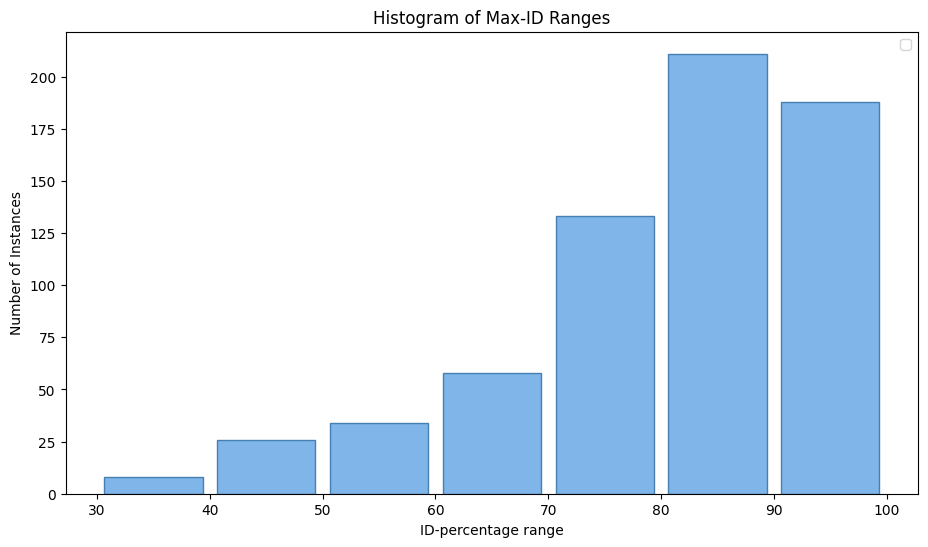

In [17]:
for tab_data in files_to_read:
    print(tab_data)
    tab_dir = data_dir + tab_data
    df = pd.read_csv(tab_dir, delimiter='\t')
    print(df.head(3))
    c3_values = df['c3'].tolist()
    print('instances: ', len(c3_values))
    plot_histogram(c3_values, 10, tab_data[:-8] + '_maxID')